In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

In [2]:
# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [3]:
#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

### Loading the Fashion-MNIST Dataset
## We are using the pandas library to read the Fashion-MNIST dataset from CSV files. The dataset is divided into two parts: the training set and the test set.

In [28]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

## X_train_fashion: This DataFrame contains the training data's features (all pixel values) by dropping the 'label' column from fashion_train.
## y_train_fashion: This Series contains the training data's labels by selecting the 'label' column from fashion_train.
## X_test_fashion: This DataFrame contains the test data's features (all pixel values) by dropping the 'label' column from fashion_test.
## y_test_fashion: This Series contains the test data's labels by selecting the 'label' column from fashion_test.

In [7]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

In [8]:
#Reshaping the data into 3D arrays (number of images, height, width) is essential for certain machine learning and deep learning models, such as convolutional neural networks (CNNs), which expect input in the form of multi-dimensional arrays representing the original image dimensions.
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

In [9]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Visualizing the images

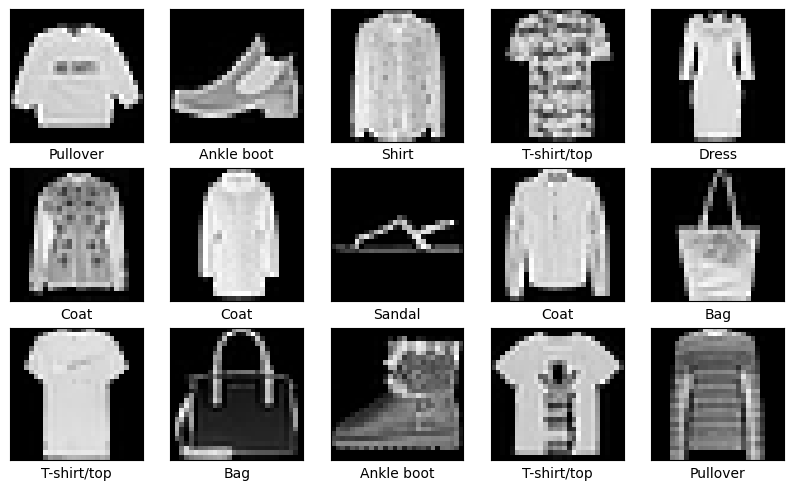

In [10]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [11]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [12]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

C:\Users\ragus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [14]:
#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5155 - loss: 1.4368 - val_accuracy: 0.8174 - val_loss: 0.5534
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7409 - loss: 0.7560 - val_accuracy: 0.8368 - val_loss: 0.4811
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7729 - loss: 0.6630 - val_accuracy: 0.8474 - val_loss: 0.4478
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7908 - loss: 0.6216 - val_accuracy: 0.8552 - val_loss: 0.4344
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7971 - loss: 0.6020 - val_accuracy: 0.8568 - val_loss: 0.4233
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7987 - loss: 0.6034 - val_accuracy: 0.8607 - val_loss: 0.4144
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8086 - loss: 0.5730 - val_accuracy: 0.8606 - val_loss: 0.4123
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8111 - loss: 0.5625 - val_acc

In [15]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8745 - loss: 0.3685


In [16]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8754


In [29]:
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


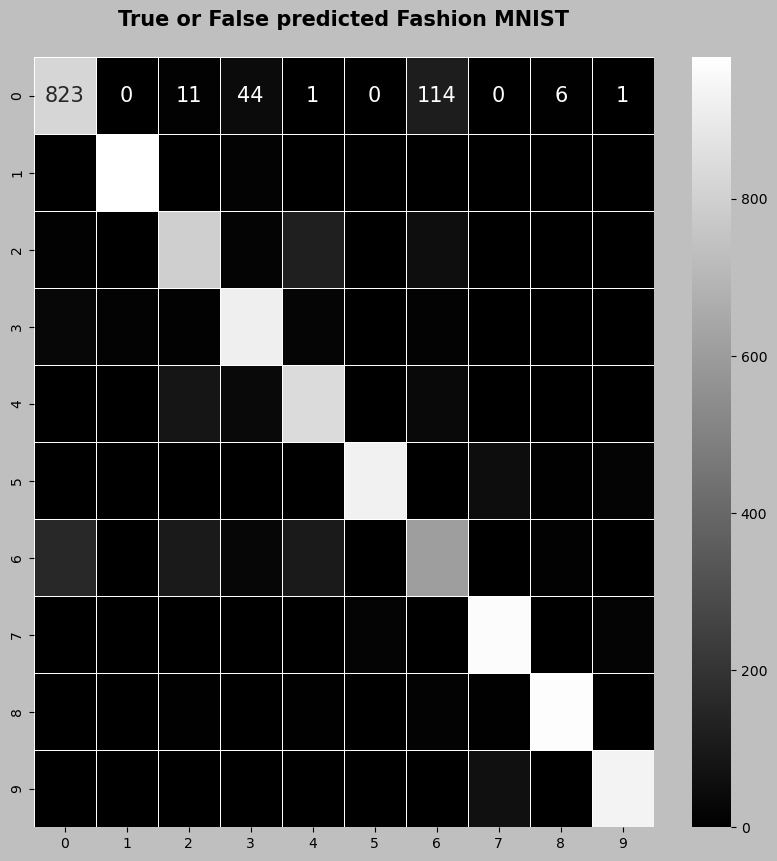

In [19]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('grayscale')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.99      0.98      0.98      1000
           2       0.79      0.80      0.79      1000
           3       0.87      0.92      0.89      1000
           4       0.77      0.84      0.81      1000
           5       0.98      0.92      0.95      1000
           6       0.72      0.60      0.66      1000
           7       0.89      0.97      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


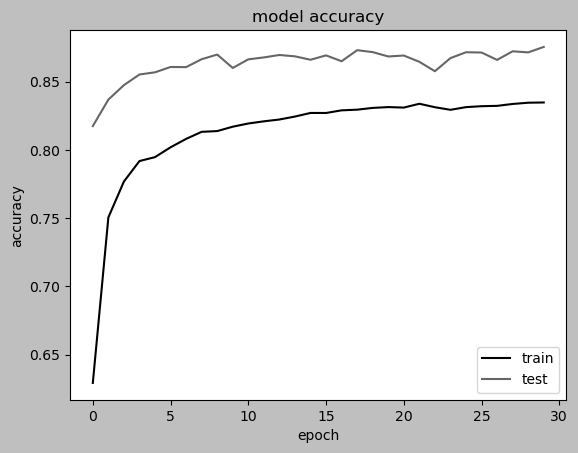

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

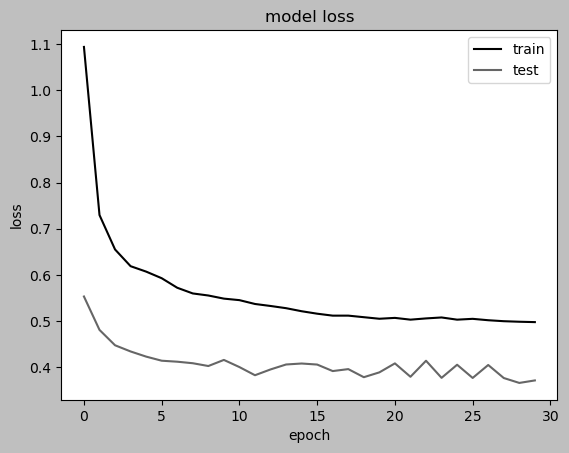

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [24]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [25]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [26]:
#Visualizing the images
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

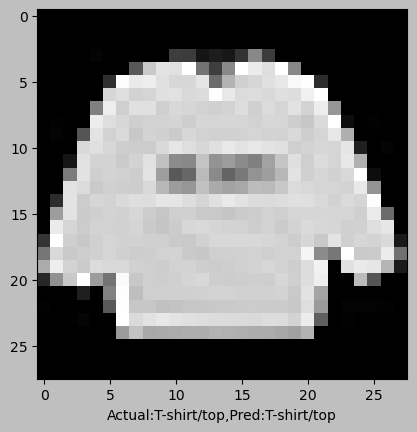

In [27]:
plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()